# Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: full time
* Scheduled project review date/time: 9/17/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL:


# Preparing Data

## Importing Various Libraries

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [68]:
# importing my own python file
%load_ext autoreload
%autoreload 10
from shb import MakeModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing data

In [ ]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')

In [20]:
# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['id', 'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [11]:
# # Determining categorical and continous columns by examining histograms
# cat_cols = []
# cont_cols = []
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=(10,7))
#     try:
#         sns.distplot(df[col], bins='auto', ax=ax)
#         ax.set(title=f'{col}', xlabel=f'{col}', ylabel='frequency')
#         plt.show()
#         user_input = input('Category(0) or continuous(1): ')
#         if user_input=='1':
#             cont_cols.append(col)
#         elif user_input=='0':
#             cat_cols.append(col)
#     except:
#         print(col)

## Preprocessing continuous columns

In [24]:
# checking for any missing values
df[cont_cols].isna().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> Notice that there aren't any missing values! Yay!

In [161]:
model1 = MakeModel(df, cat_cols=cat_cols, cont_cols=cont_cols)


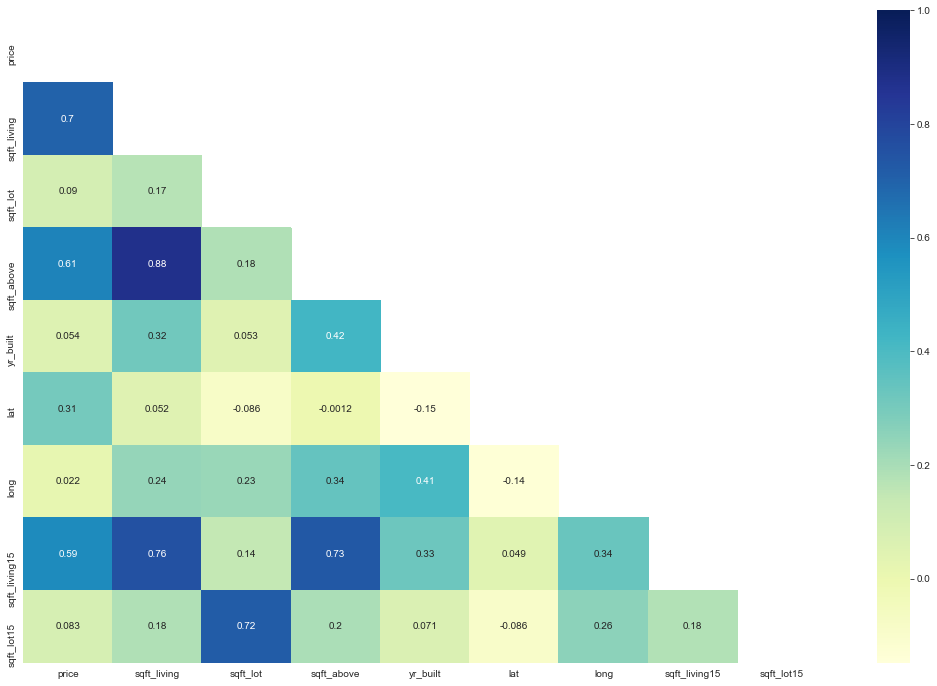

In [162]:
model1.corr_map(option='cont');

In [163]:
model1.current_size / model1.org_size

1.0

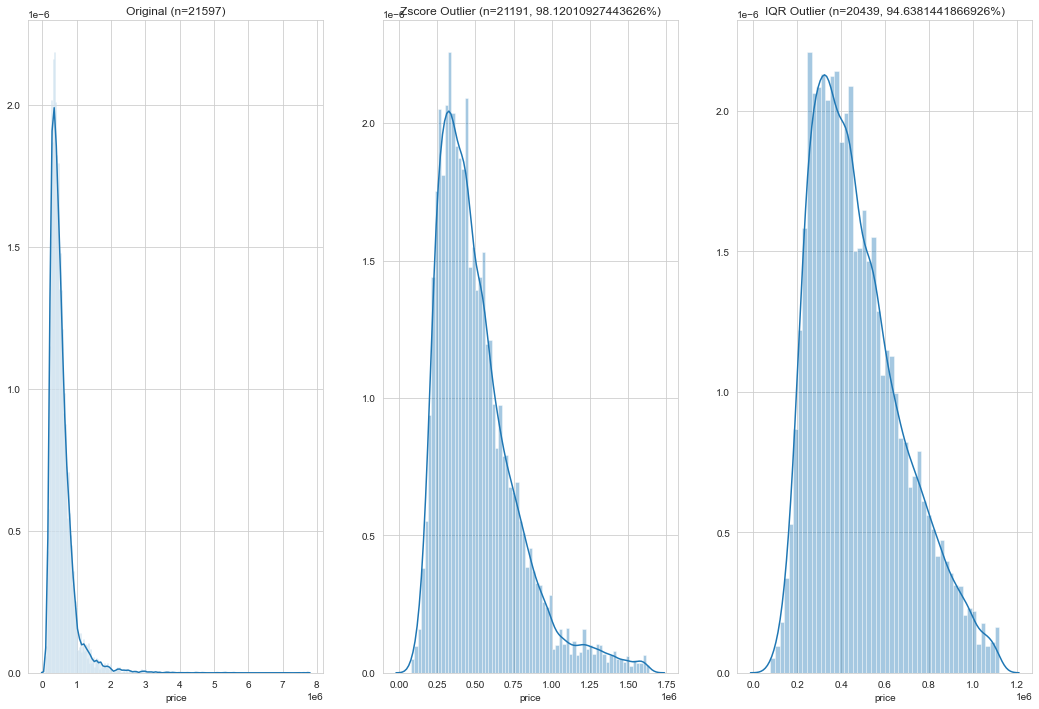

Choose an option (1) none (2) zscore method (3) IQR method: 3


1158 number of data have been removed by this process.

So far we have 94.638% of original data.


In [164]:

# for col in cont_cols:
model1.outlier('price')

> Based on this correlation map, we can conclude that
    - All sqft related variables are closely related.
> We will take sqft_living 

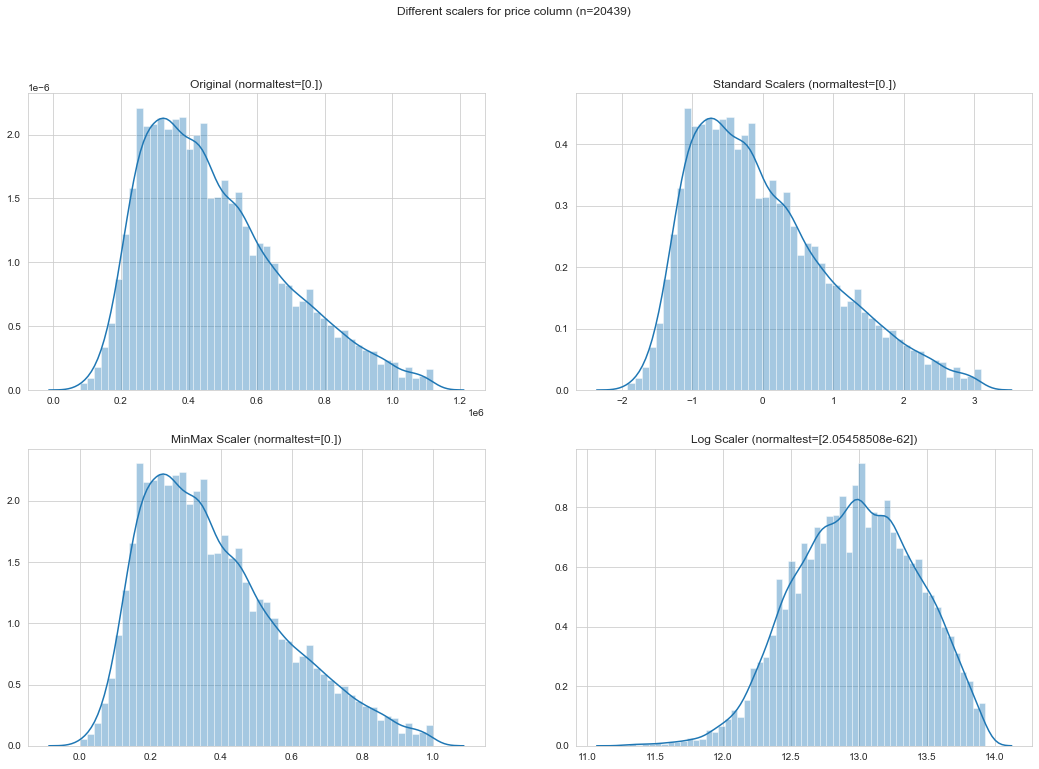

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


/Users/juhyunlee/Documents/GitHub/dsc-mod-2-project-v2-1-onl01-dtsc-ft-070620/shb.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[col] = log_data[col]


In [165]:
model1.scaler('price')

0        12.309987
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21592    12.793862
21593    12.899222
21594    12.904461
21595    12.899222
21596    12.691584
Name: price, Length: 20439, dtype: float64